# Regressão Logistica

A regressão logistica é um método de classificação.

## Pimas
Um conjunto de dados sobre diabetes, pelo nome "Pimas Indians diabetes dataset"
Kahn,Michael. Diabetes. UCI Machine Learning Repository. https://doi.org/10.24432/C5T59G.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['gravida',
               'glucose',
               'pressao',
               'pele_mm',
               'insulina',
               'bmi',
               'pedigree_func',
               'idade',
               'target']

In [3]:
features_names = column_names[:-1]

In [4]:
all_data = pd.read_csv("diabetes.csv")

In [5]:
all_data.columns = column_names

In [6]:
all_data.head(3)

,gravida,glucose,pressao,pele_mm,insulina,bmi,pedigree_func,idade,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
all_data.describe()

,gravida,glucose,pressao,pele_mm,insulina,bmi,pedigree_func,idade,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- É possível a pele_mm ser zero?
- é possível o nível de insulina ser zero?
- glucose zero, pressão sanguínea zero, pele em mm zero, nível de insulina zero, são caracteristicas impossíveis num ser humano

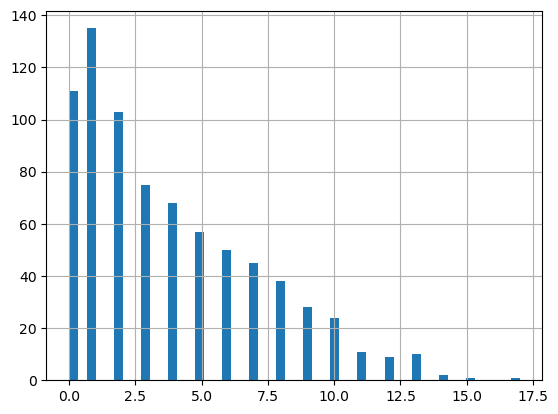

In [8]:
# visualizando histograma da variável "gravida"
%matplotlib inline
all_data.gravida.hist(bins=50)
plt.show()

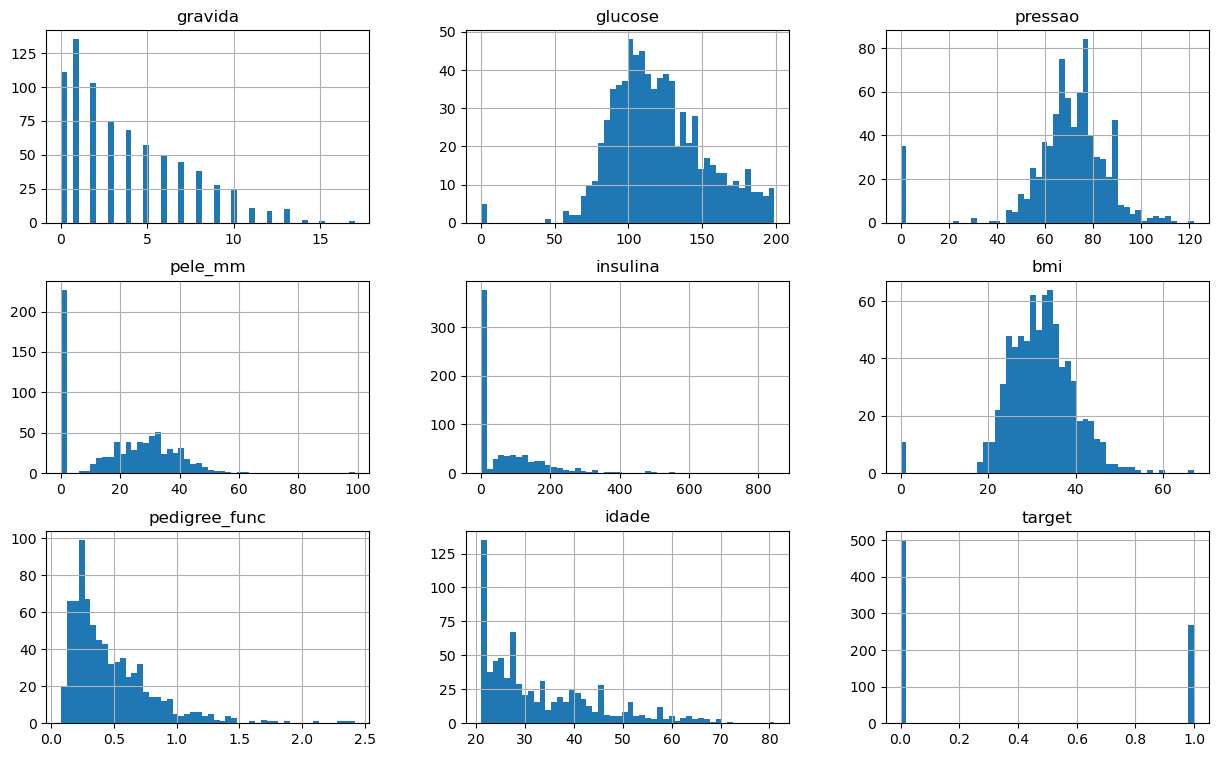

In [9]:
#visualizando tudo
all_data.hist(figsize=(15,9), bins=50)
plt.show()

> Pressão e bmi parecem ter uma distribuição normal, tirando anomalia dos zeros

In [10]:
all_data.target.value_counts()

target
0    500
1    268
Name: count, dtype: int64

In [11]:
all_data.shape

(768, 9)

## Machine Learning com Regressão Logistica

- Carregar os dados em matrizes, selecionando X e y como alvos para trabalhar.
- Separar os dados em dados de treinamento e dados para teste
- Treinar a classificador para regressão logistica no conjunto de treinamento
- Testar o desempenho do classificador no conjunto teste

In [12]:
import pandas as pd
import numpy as np


In [13]:
X = all_data[features_names]
y = all_data['target']

### Separando conjustos para teste e treinamento

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=7, stratify=y)

Ao usar o `stratify` estamos separando a mesma quantidade de 1 e 0 do conjunto y, tanto para teste como para treinamento

### Treinando A regressão logistica

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr.fit(X_treino, y_treino)

/home/io/anaconda3/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# fazendo uma previsão
y_prev = lr.predict(X_teste)

### Pontuando a regressão

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_teste, y_prev)

0.7857142857142857

## Examinando erros da regressão logistica com uma matriz confusa

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_teste, y_prev, labels=[1,0])

array([[33, 21],
       [12, 88]])

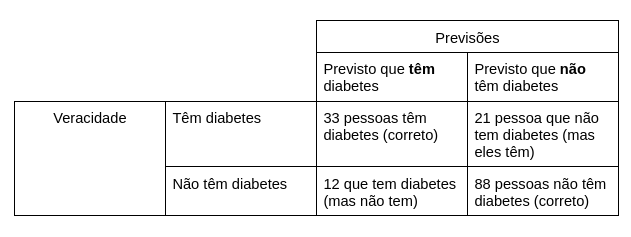

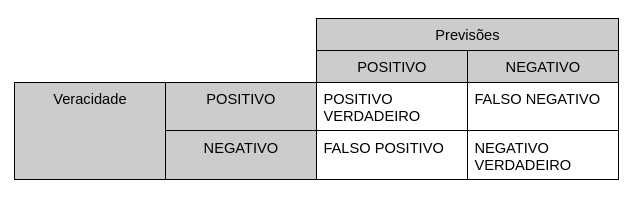

## Variando a classificação do limite na regressão logistica

Para minimizar o número de pessoas que foram mandadas para casa tendo diabetes.

In [23]:
y_prev_proba = lr.predict_proba(X_teste)

In [24]:
y_prev_proba[:5]

array([[0.90584173, 0.09415827],
       [0.8944779 , 0.1055221 ],
       [0.87787394, 0.12212606],
       [0.82382687, 0.17617313],
       [0.82168939, 0.17831061]])

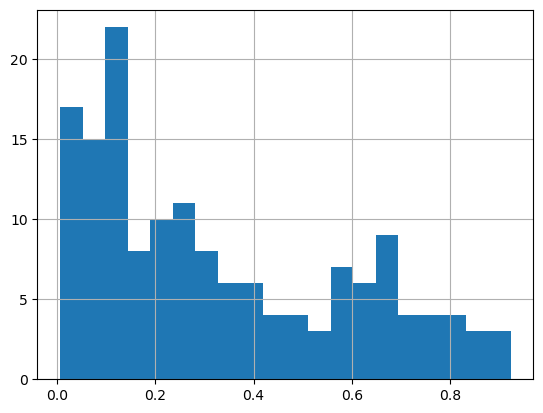

In [25]:
# visualizar um histograma do resultado positivo (1)
pd.Series(y_prev_proba[:,1]).hist(bins=20)
plt.show()

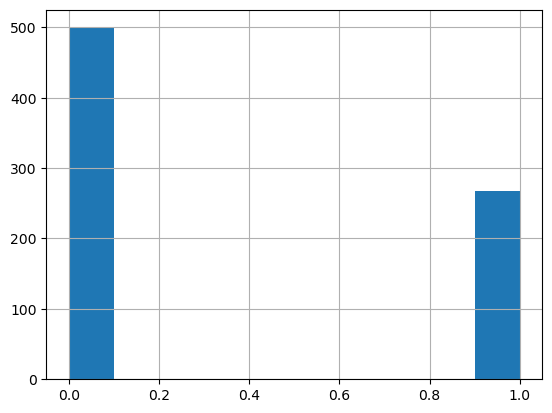

In [26]:
all_data['target'].hist()
plt.show()

A continuação será feito o seguinte: 

- Usar a função `y_pred_proba()`
- usar a função `binarize` para especificar limites
- Olhar a matriz que será gerada pelos limites

In [27]:
from sklearn.preprocessing import binarize

In [28]:
y_prev_proba[:2]

array([[0.90584173, 0.09415827],
       [0.8944779 , 0.1055221 ]])

In [29]:
y_prev_padrao = binarize(y_prev_proba, threshold=0.5)
y_prev_padrao[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1.])

Binarize vai converter os valores para 1 ao todos aqueles dados que são acima de 0.5, e zero para aqueles menos de 0.5

In [30]:
confusion_matrix(y_teste, y_prev_padrao[:,1], labels=[1,0])

array([[33, 21],
       [12, 88]])

In [31]:
y_pred_low = binarize(y_prev_proba, threshold=0.2)
confusion_matrix(y_teste, y_pred_low[:,1], labels=[1,0])

array([[47,  7],
       [42, 58]])

Para medir a precisão do teste quando é zero. Olhe a segunda coluna da matriz confusa \[7,58
], para medir a precisão 58/(58+7), aprox. 0.89 de precisão, e isso é chamado do **valor previsto negativo**

In [32]:
from __future__ import division

In [33]:
def npv_func(th):
    y_pred_low = binarize(y_prev_proba, threshold=th)
    segunda_coluna = confusion_matrix(y_teste, y_pred_low[:,1], labels=[1,0])[:,1]
    npv = segunda_coluna[1]/ segunda_coluna.sum()
    return npv

In [34]:
npv_func(0.2)

0.8923076923076924

/tmp/ipykernel_21089/167935952.py:4: RuntimeWarning: invalid value encountered in scalar divide
  npv = segunda_coluna[1]/ segunda_coluna.sum()


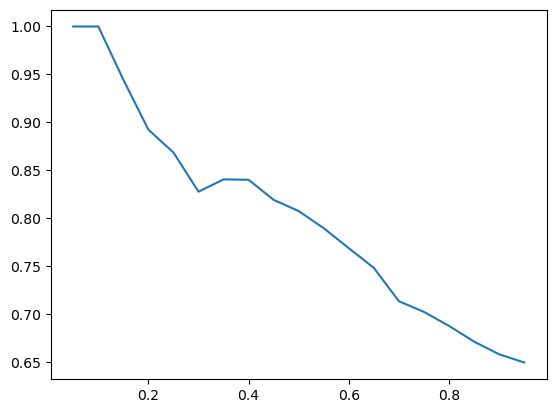

In [35]:
#visualizar
ths = np.arange(0,1,0.05)
npvs = []
for th in np.arange(0,1.00,0.05):
    npvs.append(npv_func(th))
plt.plot(ths, npvs)
plt.show()

## Receiver operating characteristics (ROC) analysis

### Sensividade

Valor previsto negativo é uma função matemática das céluas da matriz confusa.

$$sensitivo = \frac{\text{positivo verdadeiro}}{\text{positivo verdadeiro + falso negativo}}$$

## Calcular o TPR ou sensibilidade

Scikit-learn tem funções para calcular a sensibilidade ou TPR para a regressão logistica dando a probabilidade de um vetor da classe positiva

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, ths = roc_curve(y_teste, y_prev_proba[:,1])

A classe `roc_curve()` gerou 3 tuplas de matrizes

- A matriz TPR (tpr)
- A matriz FPR (fpr)
- Um conjunto de limites para calcular o TPR e FPR (ths)

Para isso trabalha-se no FPR (false positive rate - taxa de falsos positivos) que descreve a taxa de alarmes falsos.

$$FPR= \frac{\text{falso positivo}}{\text{falso positivo + negativo verdadeiro}}$$

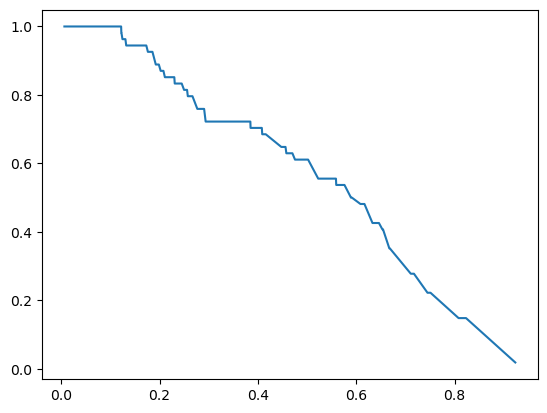

In [37]:
# visualizar a sensibilidade
plt.plot(ths,tpr)
plt.show()

Enquanto menor o limite (threshold) melhor a sensibilidade (senstitivity). Testar  a matriz confusa com um limite de 0.1

In [38]:
y_prev_th = binarize(y_prev_proba, threshold=0.121)
confusion_matrix(y_teste, y_prev_th[:,1], labels=[1,0])

array([[54,  0],
       [56, 44]])

In [39]:
33/(67+33)

0.33

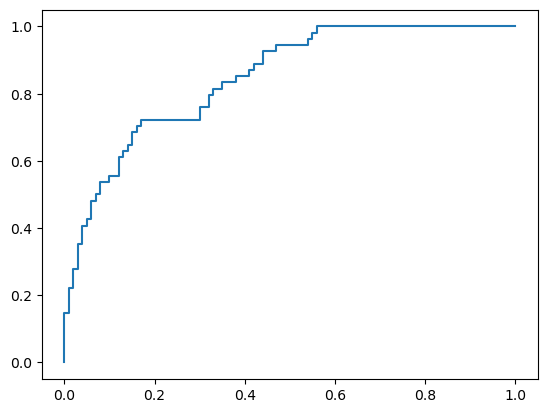

In [40]:
# visualizar o ROC
plt.plot(fpr, tpr)
plt.show()

O ROC é uma plotagem das falsas alarmes (FPR) no eixo x e o TPR(quem verdadeiramente tem a doença) no eixo y.

## AUC (area under the curve - área abaixo da curva)

In [41]:
from sklearn.metrics import auc

In [42]:
auc(fpr, tpr)

0.8464814814814814

## Conjunto de Dados De cáncer de mama

Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [43]:
df = pd.read_csv("breast_cancer.csv")

In [44]:
column_names = ["id",
                "diagnostico",
                "radio",
                "textura",
                "perimetro",
                "area",
                "suavidade",
                "compactacao",
                "concavidade",
                "pontos concavos",
                "simetria"
               ]

In [45]:
cancer_data = df.iloc[:,0:11].copy()
cancer_data.columns = column_names
cancer_data.head(3)

,id,diagnostico,radio,textura,perimetro,area,suavidade,compactacao,concavidade,pontos concavos,simetria
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069


In [46]:
cancer_data.dtypes

id                   int64
diagnostico         object
radio              float64
textura            float64
perimetro          float64
area               float64
suavidade          float64
compactacao        float64
concavidade        float64
pontos concavos    float64
simetria           float64
dtype: object

In [47]:
# convertendo o diagnostico em número 1 e 0 (1=benigno ; 0=maligno)
cancer_data["diagnostico"] = np.where(cancer_data["diagnostico"] == "B", "1","0")
cancer_data["diagnostico"] = cancer_data["diagnostico"].astype(np.int64)

In [48]:
cancer_data.head(3)

,id,diagnostico,radio,textura,perimetro,area,suavidade,compactacao,concavidade,pontos concavos,simetria
0,842302,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069


In [49]:
cancer_data["diagnostico"].value_counts()

diagnostico
1    357
0    212
Name: count, dtype: int64

In [50]:
cancer_data.dtypes

id                   int64
diagnostico          int64
radio              float64
textura            float64
perimetro          float64
area               float64
suavidade          float64
compactacao        float64
concavidade        float64
pontos concavos    float64
simetria           float64
dtype: object

In [51]:
X = cancer_data
y2 = cancer_data.diagnostico

Separar os dados em conjunto de dados de treinamento e conjunto de dados para teste

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_trein, X_test, y_trein, y_test = train_test_split(X, y2, test_size=0.2, random_state=7, stratify=y2)

Treinar e preveer a regressão logistica, e usar o método `predict_proba()`

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr.fit(X_trein, y_trein)
y_pred_proba = lr.predict_proba(X_test)

Desenhando a curva ROC e calcular o área em baixo deste

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [57]:
fpr ,tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

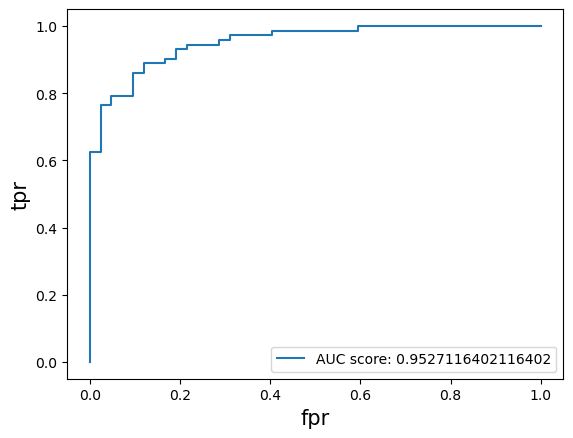

In [58]:
auc_score = auc(fpr,tpr)
plt.plot(fpr, tpr, label=f"AUC score: {str(auc_score)}")
plt.xlabel("fpr", fontsize='15')
plt.ylabel("tpr", fontsize='15')
plt.legend(loc="best")
plt.show()

Dessa forma o classificador desempenha bem.